In this regression task we will predict the percentage of marks that a student is expected to
score based upon the number of hours they studied. This is a simple linear regression task as it
involves just two variables. Data can be found at http://bit.ly/w-data
What will be predicted score if a student study for 9.25 hrs in a day?

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data

In [6]:
data = pd.read_csv('http://bit.ly/w-data')

In [91]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.shape

(25, 2)

The dataset consists of two columns and 25 rows.

# Visualizing the data

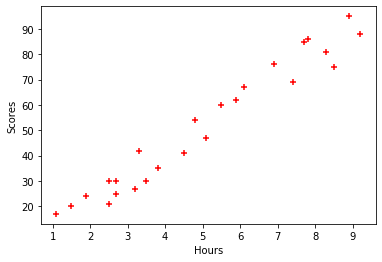

In [9]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(data.Hours,data.Scores, color = 'red', marker='+')
plt.show()  

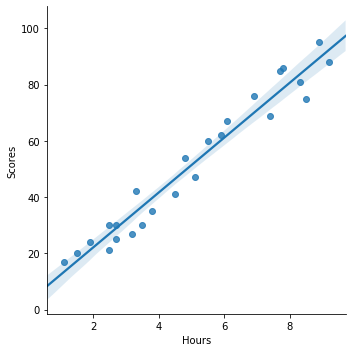

In [10]:
sns.lmplot(x = 'Hours', y = 'Scores', data = data)
plt.show()

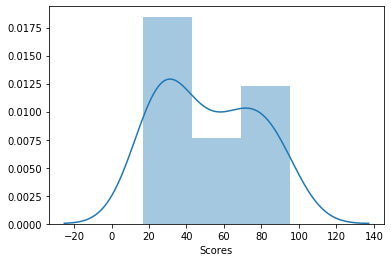

In [12]:
target = data['Scores']
sns.distplot(target,hist=True)
plt.show()

# Spliting the data

Here we will take 'Scores' column as target and we will take test size as 2

In [73]:
df = data.iloc[:,:-1].values
target = data.iloc[:,1].values

In [83]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (20, 1)
x_test  (5, 1)
y_train  (20,)
y_test  (5,)


In [84]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
prediction=reg.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predection':prediction})

,Actual,Predection
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Mean Squared Error**

In [86]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,prediction)

In [87]:
mse

21.5987693072174

**Root Mean Squared Error**

In [88]:
rmse = np.sqrt(mse)
rmse

4.6474476121003665

**Mean Absolute Error**

In [89]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,prediction)

In [90]:
mae

4.183859899002975

**R2 score**

In [92]:
from sklearn.metrics import r2_score
rsquare_score = r2_score(y_test,prediction)

In [93]:
rsquare_score

0.9454906892105356

**Predicting score if student studies for 9.25 hrs**

In [56]:
reg.predict([[9.25]])

array([[92.91505723]])

In [96]:
cols = ['Model', 'R-Squared Value', 'Mean Squared Error Value', 'Mean Absolute Error','RMSE']
models_report = pd.DataFrame(columns = cols)
tmp2 = pd.Series({'Model': "Simple Linear Regression Model",
                  'R-Squared Value': rsquare_score,
                  'Mean Squared Error Value': mse,
                  'Mean Absolute Error' : mae,
                  'RMSE': rmse})

model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,Mean Squared Error Value,Mean Absolute Error,RMSE
0,Simple Linear Regression Model,0.945491,21.598769,4.18386,4.647448
